In [14]:
# Modszereket biztosit a nagy, tobbdimenzios tombokkel valo munkavegzeshez
import numpy as np 
# Lehetove teszi az adatok tovabbi feldolgozasat es elemzeset
import pandas as pd
from pandas_datareader import data as pdr # Reszvenyadatot olvas
import matplotlib.pyplot as plt # Abrazolas
import matplotlib.dates as mdates # Stilusosabb datumok
%matplotlib inline
import datetime as dt # Datumok definialasara
import mplfinance as mpf # Matplotlib finance
import yfinance as yfin

## Function that Saves Stock Data to CSV

In [15]:
# Function that gets a dataframe by providing a ticker and starting date
def save_to_csv(ticker, start, end):
    
    # Reads data into a dataframe
    df = pdr.DataReader(ticker, start, end)
    
    # Save data to a CSV file
    # For Windows
    df.to_csv('\\Users\\Asus\\Documents\\Python for Finance\\Python\\' + ticker + '.csv')
    # For MacOS
    # df.to_csv("/Users/Asus/Documents/Tutorials/Python for Finance/" + ticker + '.csv')
    return df

## Function that Returns a Dataframe from a CSV

In [16]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv(ticker):
    
    # Try to get the file and if it doesn't exist issue a warning
    try:
        # For Windows
        df = pd.read_csv('C:\\Users\\Asus\\Documents\\Python for Finance\\Python\\' + ticker + '.csv')
        # For MacOS
        # df = pd.read_csv("/Users/Asus/Documents/Tutorials/Python for Finance/" + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

## Add Daily Return to Dataframe

In [17]:
# We calculate a percentage rate of return for each day to compare investments.
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price OR (EP / BP) - 1

# Shift provides the value from the previous day
# NaN is displayed because there was no previous day price for the 1st calculation
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    # Save data to a CSV file
    # For Windows
    df.to_csv('C:\\Users\\Asus\\Documents\\Python for Finance\\Python\\' + ticker + '.csv')
    # For MacOS
    # df.to_csv("/Users/Asus/Documents/Tutorials/Python for Finance/" + ticker + '.csv')
    return df

## Returns Total Return over Time

In [18]:
def get_return_defined_time(df, start, end):
    # Compound is not calculated here

    df['Date'] = pd.to_datetime(df['Date'])
    
    # Use a mask to grab data between defined dates
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    
    # Get the mean of the column named daily return
    daily_ret = df.loc[mask]['daily_return'].mean()
    
    # Get the number of days between 2 dates
    df2 = df.loc[mask]
    days = df2.shape[0]

    # Return the total return between 2 dates
    return (days * daily_ret)

## Matplotlib Finance

In [19]:
# Receives a ticker and the date range for which to plot
def mplfinance_plot(ticker, chart_type, start, end):
    
    try:
        # For Windows
        df = pd.read_csv('C:\\Users\\Asus\\Documents\\Python for Finance\\Python\\' + ticker + '.csv',index_col=0,parse_dates=True)
        # For MacOS
        # df = pd.read_csv('/Users/Asus/Documents/Tutorials/Python for Finance/' + ticker + '.csv',index_col=0,parse_dates=True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # A candlestick chart demonstrates the daily open, high, low and closing price of a stock
        mpf.plot(df_sub,type='candle')

        # Plot price changes
        mpf.plot(df_sub,type='line')

        # Moving averages provide trend information (Average of previous 4 observations)
        mpf.plot(df_sub,type='ohlc',mav=4)
        
        # Define a built in style
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        # Pass in the defined style to the whole canvas
        fig = mpf.figure(figsize=(12, 8), style=s, dpi=120) 
        # Candle stick chart subplot
        ax = fig.add_subplot(2,1,1) 
        # Volume chart subplot
        av = fig.add_subplot(2,1,2, sharex=ax)  

        # You can plot multiple MAVs, volume, non-trading days
        mpf.plot(df_sub,type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

## Simple Price Plot

In [20]:
# Creates a simple price / date plot between dates
def price_plot(ticker, start, end):
    
    try:
        # For Windows
        df = pd.read_csv('C:\\Users\\Asus\\Documents\\Python for Finance\\Python\\' + ticker + '.csv')
        # For MacOS
        # df = pd.read_csv("/Users/Asus/Documents/Tutorials/Python for Finance/" + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # Convert to Numpy array
        df_np = df_sub.to_numpy()
        
        # Get adjusted close data from the 5th column
        np_adj_close = df_np[:,5]
        
        # Get date from the 1st
        date_arr = df_np[:,1]
        
        # Defines area taken up by the plot
        fig = plt.figure(figsize=(14,10),dpi=120)
        axes = fig.add_axes([0,0,1,1])
        
        # Define the plot line color as navy
        axes.plot(date_arr, np_adj_close, color='navy')
        
        # Set max ticks on the x axis
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        
        # Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        
        # Set grid background color
        axes.set_facecolor('#FAEBD7')

## Download Multiple Stocks

In [21]:
def download_multiple_stocks(start, end, *args):
    for x in tickers:
        save_to_csv(x, start, end)

## Merge Multiple Stocks in One Dataframe by Column Name

In [22]:
def merge_df_by_column_name(col_name, start, end, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        mult_df[x] = pdr.DataReader(x, start, end)[col_name]
    return mult_df

## Get Changing Value of Investment using Multiple Stocks

In [23]:
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (17,8))

## Get Standard Deviation for Multiple Stocks

Risk is a measure of the variability of return. Variance and Standard Deviation allow us to quantify risk.


Variance is a measure of how spread out a data set is. It is calculated as the average squared deviation of each number from the mean of a data set.n It equals the sum of the squares of the difference between each data point and the mean divided by the number of data points minus 1.

$s^2$ = $\frac{\sum (x - \hat{x})^2}{N - 1}$

Example : If we have 3 annual returns of 23%, -8% and 15%. The mean return is 10%.

* $(23 - 10)^2$ = 169
* $(-8 - 10)^2$ = 324
* $(15 - 10)^2$ = 25
* = 169 + 324 + 25 = 518 / (3-1) = 259 = 2.59

---

Standard deviation is a measure of the amount of variation within a set of values. A low standard deviation indicates that the values tend to be close to the mean. A high standard deviation means values are more spread out. To get the Standard Deviation find the square root of the variance.

$\sqrt{s^2}$ = $\sqrt{2.59}$ = 1.609

In [24]:
# Receives the dataframe with the Adj Close data along with the stock ticker
# Returns the mean and standard deviation associated with the ticker
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [34]:
def get_mult_stock_mean_sd(stock_df):
    stock_stats = []
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        if pd.isna(mean) or pd.isna(sd):
            continue  # Skip stocks with NaN values
        
        cov = sd / mean
        stock_stats.append((stock, mean, sd, cov))
    
    # Sort stock_stats based on the coefficient of variation in inc order
    stock_stats.sort(key=lambda x: x[3], reverse=False)

    # Print only the top 20 stocks
    count = 0
    print("Top 20 stocks based on Coefficient of Variation:")
    for stock, mean, sd, cov in stock_stats:
        if count >= 20:
            break
        
        print("Stock: {:4} Mean: {:7.2f} Standard Deviation: {:2.2f} Coefficient of Variation: {:2.2f}".format(stock, mean, sd, cov))
        count += 1

## Test Functions

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********


1 Failed download:
['MXIM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed


1 Failed download:
['NASDAQ']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-01-01 -> 2023-06-30)')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

,AAPL,ABNB,ADBE,ADI,ADP,ADSK,ALGN,AMAT,AMGN,AMZN,...,TXN,VRSK,VRTX,WBA,WDAY,WBD,WDC,XEL,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,37.994492,NaN,224.570007,78.879616,118.523415,128.960007,202.119995,31.758568,167.338028,76.956497,...,83.555298,105.464294,164.080002,56.536221,159.740005,25.830000,36.312469,42.583515,NaN,39.810001
2019-01-03,34.209957,NaN,215.699997,74.114876,114.944199,121.849998,184.779999,29.918316,164.791763,75.014000,...,78.627792,102.241646,163.729996,55.946247,154.020004,25.680000,33.835327,42.415730,NaN,39.320000
2019-01-04,35.670357,NaN,226.190002,75.914268,119.525230,128.279999,186.710007,31.967257,170.424942,78.769501,...,82.184090,106.755302,172.699997,57.807526,163.350006,26.139999,35.268467,42.830780,NaN,41.770000
2019-01-07,35.590973,NaN,229.259995,76.391640,118.878593,132.720001,189.919998,32.536404,172.718307,81.475502,...,83.599533,106.862076,175.850006,58.139885,163.500000,26.530001,36.521267,42.645332,NaN,43.560001
2019-01-08,36.269451,NaN,232.679993,78.255333,119.579842,133.869995,192.949997,31.217876,174.933212,82.829002,...,83.493370,107.813362,178.190002,59.303196,166.949997,27.240000,36.170113,43.139870,NaN,43.980000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,186.679993,124.730003,484.720001,185.940002,213.830002,202.000000,328.829987,136.070007,227.110001,129.330002,...,167.679993,224.350006,347.000000,31.400000,222.250000,11.790000,37.860001,62.099998,66.620003,142.699997
2023-06-26,185.270004,123.129997,479.510010,186.339996,215.539993,200.779999,331.459991,139.800003,224.729996,127.330002,...,168.750000,223.000000,347.450012,31.590000,219.940002,11.780000,37.560001,62.860001,66.620003,141.710007
2023-06-27,188.059998,127.889999,489.269989,192.380005,215.610001,206.850006,340.690002,146.550003,222.610001,129.179993,...,176.309998,224.630005,347.119995,28.639999,224.220001,12.270000,38.209999,62.439999,68.050003,144.660004


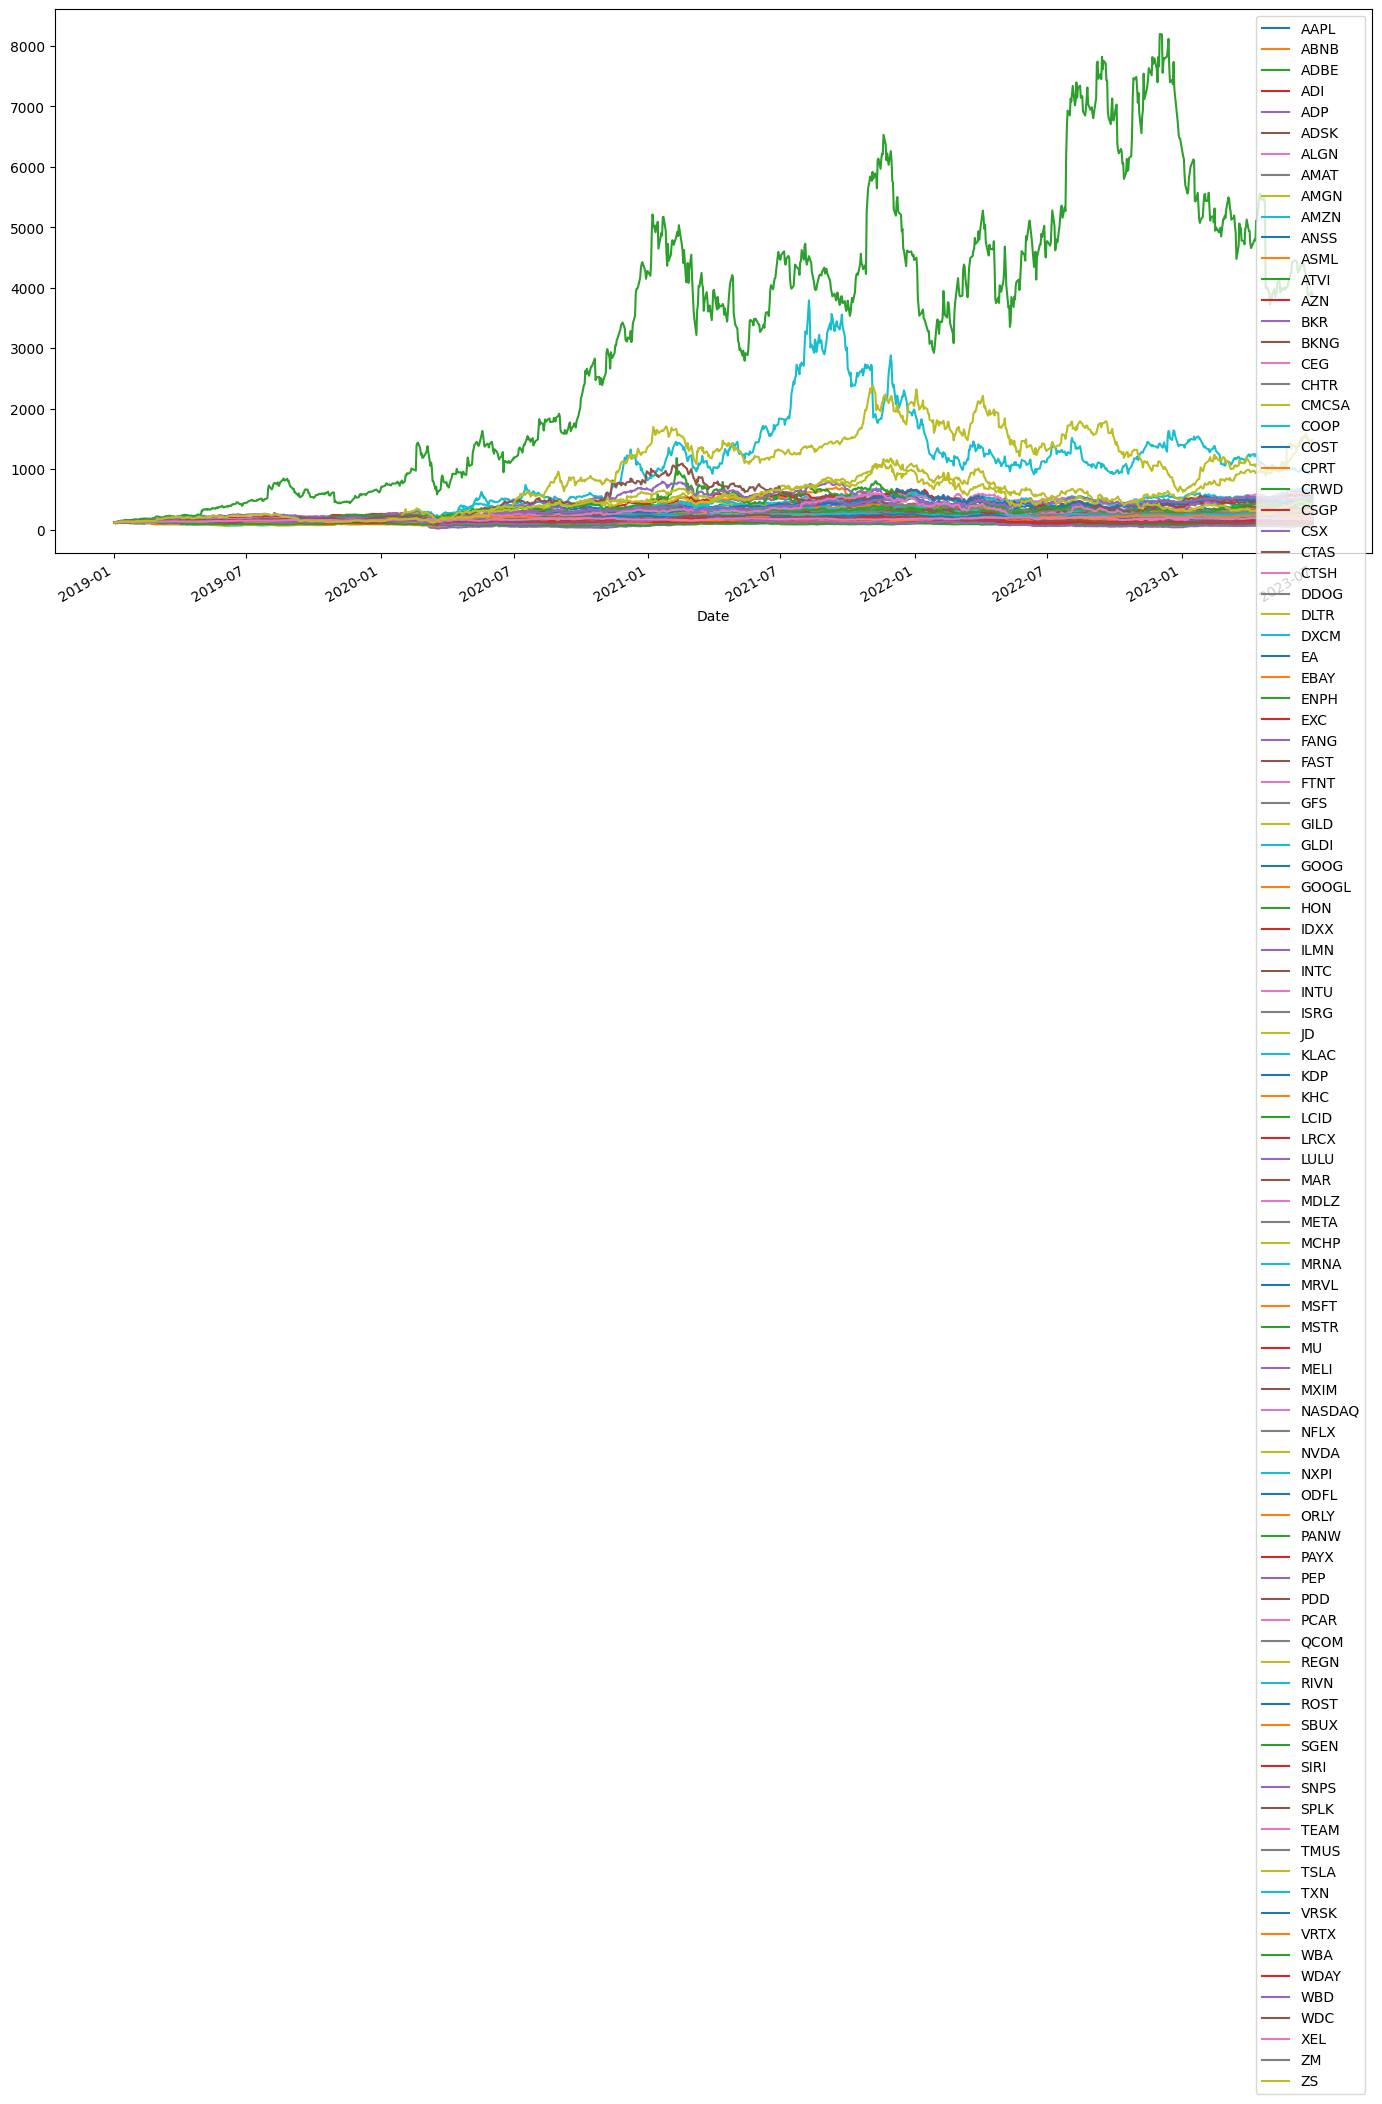

In [36]:
yfin.pdr_override()

# save_to_csv('GOOG', '2020-01-01', '2023-06-30')

# MSFT = get_df_from_csv('MSFT')

# add_daily_return_to_df(MSFT, 'MSFT')

# tot_ret = get_return_defined_time(MSFT, '2022-01-01', '2023-01-01')
# print("Total Return : ", tot_ret)

# mplfinance_plot('MSFT', 'ohlc', '2022-01-01', '2023-01-01')

# price_plot('MSFT', '2022-01-01', '2023-01-01')

tickers = [
    "AAPL", "ABNB", "ADBE", "ADI", "ADP", "ADSK", "ALGN", "AMAT", "AMGN", "AMZN",
    "ANSS", "ASML", "ATVI", "AZN", "BKR", "BKNG", "CEG", "CHTR", "CMCSA", "COOP",
    "COST", "CPRT", "CRWD", "CSGP", "CSX", "CTAS", "CTSH", "DDOG", "DLTR", "DXCM",
    "EA", "EBAY", "ENPH", "EXC", "FANG", "FAST", "FTNT", "GFS", "GILD",
    "GLDI", "GOOG", "GOOGL", "HON", "IDXX", "ILMN", "INTC", "INTU", "ISRG", "JD",
    "KLAC", "KDP", "KHC", "LCID", "LRCX", "LULU", "MAR", "MDLZ", "META", "MCHP",
    "MRNA", "MRVL", "MSFT", "MSTR", "MU", "MELI", "MXIM", "NASDAQ", "NFLX", "NVDA",
    "NXPI", "ODFL", "ORLY", "PANW", "PAYX", "PEP", "PDD", "PCAR", "QCOM", "REGN",
    "RIVN", "ROST", "SBUX", "SGEN", "SIRI", "SNPS", "SPLK", "TEAM", "TMUS", "TSLA",
    "TXN", "VRSK", "VRTX", "WBA", "WDAY", "WBD", "WDC", "XEL", "ZM", "ZS"
]
#download_multiple_stocks('2017-01-01', '2023-06-30', *tickers)

# ==============================================================
#tickers = [
#    "AAPL", "ABNB", "ADBE", "ADI", "ADP", "ADSK", "ALGN", "AMAT", "AMGN", "AMZN",
#    "ANSS", "ASML", "ATVI", "AZN", "BKR", "BKNG", "CEG", "CHTR", "CMCSA", "COOP",
#   "COST", "CPRT", "CRWD", "CSGP", "CSX", "CTAS", "CTSH", "DDOG", "DLTR", "DXCM",
#   "EA", "EBAY", "ENPH", "EXC", "FANG", "FAST", "FTNT", "GFS", "GILD",
#  "GLDI", "GOOG", "GOOGL", "HON", "IDXX", "ILMN", "INTC", "INTU", "ISRG", "JD",
#  "KLAC", "KDP", "KHC", "LCID", "LRCX", "LULU", "MAR", "MDLZ", "META", "MCHP",
#  "MRNA", "MRVL", "MSFT", "MSTR", "MU", "MELI", "MXIM", "NASDAQ", "NFLX", "NVDA",
#  "NXPI", "ODFL", "ORLY", "PANW", "PAYX", "PEP", "PDD", "PCAR", "QCOM", "REGN",
#  "RIVN", "ROST", "SBUX", "SGEN", "SIRI", "SNPS", "SPLK", "TEAM", "TMUS", "TSLA",
#  "TXN", "VRSK", "VRTX", "WBA", "WDAY", "WBD", "WDC", "XEL", "ZM", "ZS"
#]
mult_df = merge_df_by_column_name('Adj Close', '2019-01-01', '2023-06-30', *tickers)
plot_return_mult_stocks(120, mult_df)
get_mult_stock_mean_sd(mult_df)
mult_df
